In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
import nltk
import string
from nltk.corpus import stopwords

In [2]:
import os
print(os.listdir("C:/Users/91982/Desktop/NTCC"))

['.ipynb_checkpoints', 'certifcate_manan.docx', 'certificate_spraha.docx', 'Code1 .ipynb', 'code1.ipynb', 'code2.ipynb', 'codentcc.txt', 'Data.zip', 'digital_WPR week-1 Spraha Kumawat_A2305220277.pdf', 'digital_WPR week-2 Spraha Kumawat_A2305220277.pdf', 'digitial_WPR_week-1.pdf', 'FinalCode.ipynb', 'finalfinalcode.ipynb', 'firstpage.py', 'fourth.py', 'Literature review.docx', 'LR.pickle', 'maincode.py', 'pic1.png', 'pic2.png', 'pic3.png', 'Reviews-original.csv', 'Reviews.csv', 'Reviews.html', 'second.py', 'sentiment', 'teststreamlit.py', 'third.py', 'third0.py', 'tsvcsv.py', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'vectorizer.pickle', 'Vs code.docx', 'WPR week-2 Spraha_Kumawat_A2305220277.pdf', 'wpr week-3 .pdf', '__pycache__']


In [3]:
df= pd.read_csv("C:/Users/91982/Desktop/NTCC/Reviews.csv")

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,25000.500000,1.603360,2.060260,4.145840,1.295198e+09
std,14433.901067,5.620771,6.216044,1.325596,4.734622e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,12500.750000,0.000000,0.000000,4.000000,1.269648e+09
50%,25000.500000,0.000000,1.000000,5.000000,1.309133e+09
75%,37500.250000,2.000000,2.000000,5.000000,1.331078e+09
max,50000.000000,398.000000,401.000000,5.000000,1.351210e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      50000 non-null  int64 
 1   ProductId               50000 non-null  object
 2   UserId                  50000 non-null  object
 3   ProfileName             49997 non-null  object
 4   HelpfulnessNumerator    50000 non-null  int64 
 5   HelpfulnessDenominator  50000 non-null  int64 
 6   Score                   50000 non-null  int64 
 7   Time                    50000 non-null  int64 
 8   Summary                 49998 non-null  object
 9   Text                    50000 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


In [8]:
data1=pd.DataFrame(df.groupby('Score').size().sort_values(ascending=False).rename('No of Users').reset_index())
data1.head()

,Score,No of Users
0,5,31130
1,4,7288
2,1,4721
3,3,4047
4,2,2814


In [9]:
data2 = df[['Score' , 'Text' , 'Summary' , 'UserId']]
finaldata=data2.dropna()
finaldata.head()

,Score,Text,Summary,UserId
0,5,I have bought several of the Vitality canned d...,Good Quality Dog Food,A3SGXH7AUHU8GW
1,1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,A1D87F6ZCVE5NK
2,4,This is a confection that has been around a fe...,"""Delight"" says it all",ABXLMWJIXXAIN
3,2,If you are looking for the secret ingredient i...,Cough Medicine,A395BORC6FGVXV
4,5,Great taffy at a great price. There was a wid...,Great taffy,A1UQRSCLF8GW1T


In [10]:
finaldata['Summary'].fillna("Good", inplace = True)

C:\Users\91982\AppData\Local\Temp\ipykernel_11680\3299705697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata['Summary'].fillna("Good", inplace = True)


In [11]:
finaldata.isnull().sum()

Score      0
Text       0
Summary    0
UserId     0
dtype: int64

In [12]:
finaldata["Sentiment"] = finaldata["Score"].apply(lambda score: "positive" if score > 3 else "negative")
finaldata['Sentiment'] = finaldata['Sentiment'].map({'positive':1, 'negative':0})

C:\Users\91982\AppData\Local\Temp\ipykernel_11680\240244361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata["Sentiment"] = finaldata["Score"].apply(lambda score: "positive" if score > 3 else "negative")
C:\Users\91982\AppData\Local\Temp\ipykernel_11680\240244361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata['Sentiment'] = finaldata['Sentiment'].map({'positive':1, 'negative':0})


In [13]:
finaldata.columns

Index(['Score', 'Text', 'Summary', 'UserId', 'Sentiment'], dtype='object')

In [14]:
Senti = finaldata[(finaldata['Sentiment']== 0) | (finaldata['Sentiment']==1)]
print(Senti)

       Score                                               Text  \
0          5  I have bought several of the Vitality canned d...   
1          1  Product arrived labeled as Jumbo Salted Peanut...   
2          4  This is a confection that has been around a fe...   
3          2  If you are looking for the secret ingredient i...   
4          5  Great taffy at a great price.  There was a wid...   
...      ...                                                ...   
49995      5  My sister introduced me to these. They have be...   
49996      5  A friend recommended these bars and I fell in ...   
49997      5  Fabulous!  I take one to work with me every da...   
49998      4  I love these bars and will continue to buy the...   
49999      5  These are very good; nutritious, great flavor ...   

                               Summary          UserId  Sentiment  
0                Good Quality Dog Food  A3SGXH7AUHU8GW          1  
1                    Not as Advertised  A1D87F6ZCVE5NK     

In [15]:
y = Senti['Sentiment']
x = Senti['Summary']
print(x)

0                  Good Quality Dog Food
1                      Not as Advertised
2                  "Delight" says it all
3                         Cough Medicine
4                            Great taffy
                      ...               
49995          Grown to really like them
49996    Healthy Snack at a great price!
49997     Raw Revolution Hazelnut Cashew
49998      fantastic, but chew carefully
49999            Very Tasty and Healthy.
Name: Summary, Length: 49998, dtype: object


In [16]:
print(y)

0        1
1        0
2        1
3        0
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Sentiment, Length: 49998, dtype: int64


In [17]:
stop = set(stopwords.words('english'))

In [18]:
text = Senti['Text']
labels = Senti['Sentiment']

In [19]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])

    return doco_clean

In [20]:
clean = [clean_document(doc) for doc in text];
sentence = [' '.join(r) for r in clean ]

In [21]:
print(sentence[1])

product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo


In [22]:
print(text[1])

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


In [23]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc) 
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
tokens = x[0].split()
print(tokens)

['Good', 'Quality', 'Dog', 'Food']


In [25]:
sample_text = "Hey there! This is a project"
print(text_process(sample_text))

['Hey', 'project']


In [26]:
vector = CountVectorizer(analyzer=text_process).fit(x)
len(vector.vocabulary_)

17086

In [27]:
sample=x[20]
v = vector.transform([sample])
print(v)

  (0, 568)	1
  (0, 12246)	1


In [28]:
X = vector.transform(x)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

C:\Users\91982\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
pred= LRmodel.predict(X_test)

[[1183 1156]
 [ 321 7340]]


              precision    recall  f1-score   support

           0       0.79      0.51      0.62      2339
           1       0.86      0.96      0.91      7661

    accuracy                           0.85     10000
   macro avg       0.83      0.73      0.76     10000
weighted avg       0.85      0.85      0.84     10000



Text(33.0, 0.5, 'Truth')

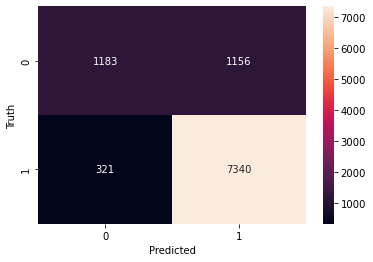

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, pred)
print(cm)
print('\n')
print(classification_report(y_test, pred))
LRmodel.score(X_train, y_train)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.8523


In [34]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, pred, average=None)
print("Recall :",recall)

Recall : [0.5057717  0.95809946]


In [35]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, pred, average=None) 
print("Precision :",precision)

Precision : [0.78656915 0.86393597]


In [36]:
f1s = 2 * (precision * recall) / (precision + recall)
print("F-1 Score :",f1s)

F-1 Score : [0.61566485 0.90858451]


In [37]:
pred1 = Senti['Summary'][544]
pred1

'Stale, Rancid Oil Taste, And if You Like Even the Tiniest Bit of Salt Flavor on Your Chips...'

In [38]:
Senti['Sentiment'][544]

0

In [39]:
op = vector.transform([pred1])
LRmodel.predict(op)[0]

0

In [44]:
pred2 = Senti['Summary'][5]
pred2

'Nice Taffy'

In [45]:
Senti['Sentiment'][5]

1

In [46]:
op1 = vector.transform([pred2])
LRmodel.predict(op1)[0]

1